In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from xgboost import XGBRegressor

## metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

## CV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [2]:
df = pd.read_csv('data/stud (1).csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_score'] / 3

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [6]:
df.drop(columns=['Total_score'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Average                      1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
## Independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:",end=" " )
print(x['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(x['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(x['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(x['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(x['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
## Now we are building a pipeline

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)

    ]

)


In [13]:
num_features

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [15]:
X = preprocessor.fit_transform(x)

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [17]:
## Train test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train.shape , X_test.shape

((700, 20), (300, 20))

In [19]:
y_train.shape , y_test.shape

((700,), (300,))

In [20]:
## Evaluation Metrice function

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)

    return mae , mse, rmse, r2_square


In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print('- Mean Square Error: {:.4f}'.format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print('- Mean Square Error: {:.4f}'.format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0827
- Mean Square Error: 1.1722
- Mean Absolute Error: 0.8663
- R2 Score: 0.9939
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1785
- Mean Square Error: 1.3888
- Mean Absolute Error: 0.9293
- R2 Score: 0.9938


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0092
- Mean Square Error: 0.0001
- Mean Absolute Error: 0.0074
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0101
- Mean Square Error: 0.0001
- Mean Absolute Error: 0.0079
- R2 Score: 1.00

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3218
- Mean Square Error: 5.3908
- Mean Absolute Error: 1.8007
- R2 Score: 0.9720
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0663
- Mean Square Error: 9.4020
- Mean Absolute Error: 2.2800
- R2 Score: 0.9583


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0003
- Mean Square Error: 4.0011
- Mean Absolute Error: 1.3411
- R2 Score: 0.9823


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3016
- Mean Square Error: 0.0910
- Mean Absolute Error: 0.1913
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2447
- Mean Square Error: 1.5494
- Mean Absolute 

## RESULTS

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.993840
5,Random Forest Regressor,0.993127
6,XGBRegressor,0.990696
4,Decision Tree,0.982252
7,AdaBoost Regressor,0.971618
3,K-Neighbors Regressor,0.958294


## So we are going with linear regression

In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

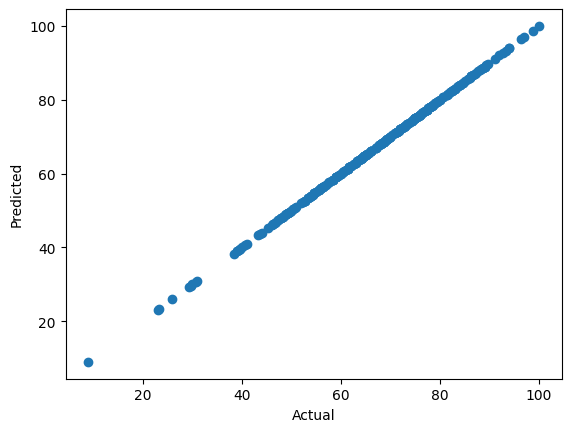

In [24]:
## Plotting y_pred and y_test
plt.scatter(y=y_pred,x=y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Average'>

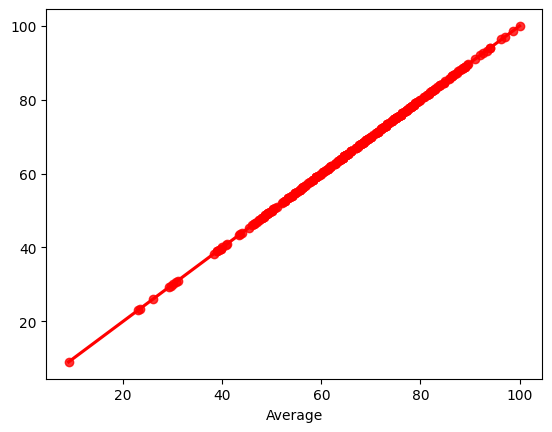

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [26]:
## Difference between actual and predicted
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred, "Difference":y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,87.000000,87.000000,-1.421085e-14
737,64.000000,64.000000,7.105427e-15
740,75.000000,75.000000,0.000000e+00
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,-1.421085e-14
...,...,...,...
468,83.333333,83.333333,-1.421085e-14
935,63.666667,63.666667,7.105427e-15
428,59.000000,59.000000,0.000000e+00
7,40.666667,40.666667,2.842171e-14
